In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, normaltest, bartlett, levene, f_oneway, ttest_ind, ranksums, kruskal, mannwhitneyu, spearmanr
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
from statsmodels.graphics import gofplots
from scipy.stats import describe,anderson,t,ttest_rel


# Normality Tests

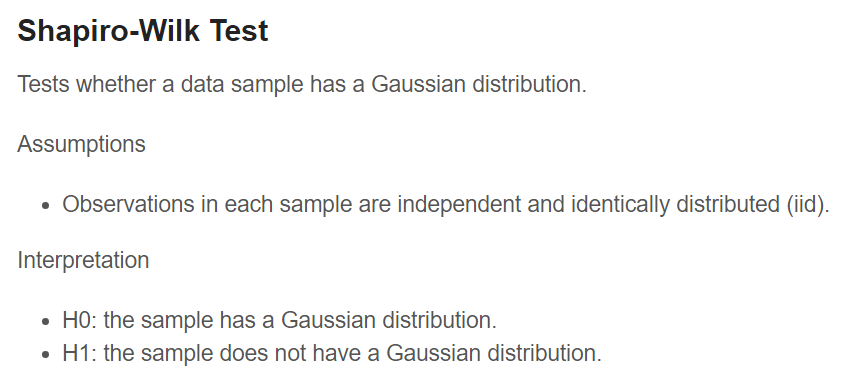

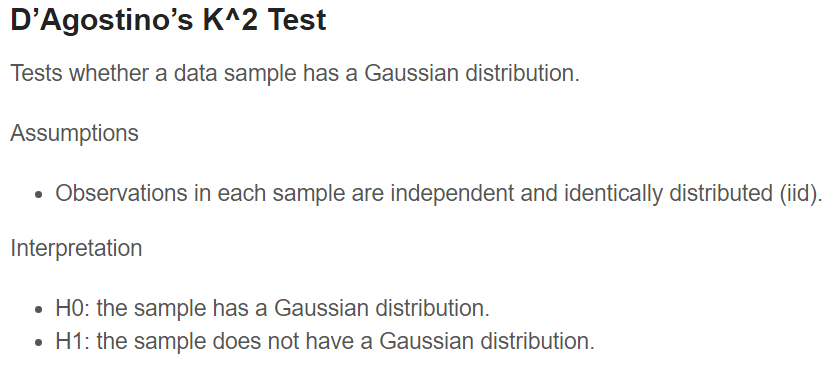

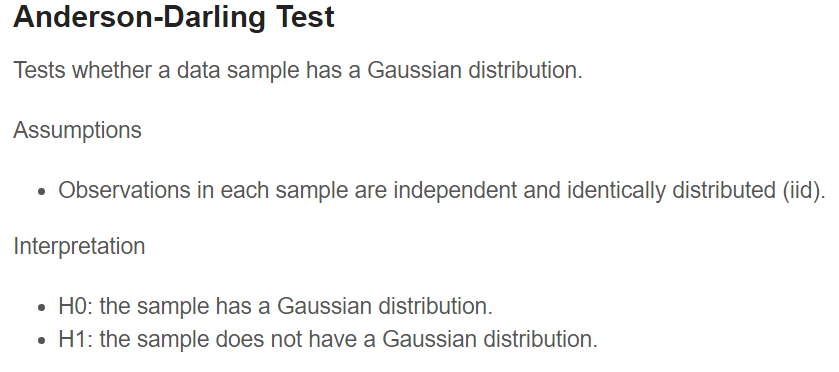

In [3]:
def normality_test(data, alpha=0.05):

    # print col describe
    print("Data describe","\n")
    print(describe(data),"\n")
    # drop nans and duplicates
    # dist plot and qqplot

    # plot col distplot
    sns.distplot(data).set_title("DistPlot for data")
    plt.show()
    # qq plot
    gofplots.qqplot(data, line='45', fit=True)
    plt.title('Q-Q plot for data')
    plt.show()
    # Shapiro-Wilk test
    print('Shapiro-Wilk Test')
    stat, p = shapiro(data)
    if p > alpha:
        print('Accept Ho: Distribution is normal (alpha = {0})'.format(alpha))
    else:
        print('Reject Ho: Distribution is not normal (alpha = {0})'.format(alpha))
    print('P_value: ', p,'\n')

    # D’Agostino’s K^2 Test (tests Skewness and Kurtosis)
    print('D’Agostino’s Test')
    stat, p = normaltest(data)
    if p > alpha:
        print('Accept Ho: Distribution is normal (alpha = {0})'.format(alpha))
    else:
        print('Reject Ho: Distribution is not normal (alpha = {0})'.format(alpha))
    print('P_value: ', p,'\n')
    
    #Anderson DArling Tests
    print('Anderson-Darling Test')
    result = anderson(data)
    print('Statistic: %.3f' % result.statistic)
    p = 0
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print('%.3f: %.3f, Accept Ho: Distribution is normal' % (sl, cv))
        else:
            print('%.3f: %.3f, Reject Ho: Distribution is not normal (reject H0)' % (sl, cv))

    print('======================================================================')


In [4]:
np.random.seed(45)def ind_ttest(data1,data2,alpha=0.05):
    print("Data1 describe")
    print(describe(data1),"\n")
    print("Data1 describe")
    print(describe(data2),"\n")
    
    X = np.concatenate((data1.reshape(-1,1),data2.reshape(-1,1)),axis=1)
    sns.boxplot(data = X)
    plt.show()
    print('Inependent T-test')
    stat, p = ttest_ind(data1, data2)

    if p > alpha:
        print('Accept Ho: Input samples are from populations with equal means (alpha = {0})'.format(alpha))
    else:
        print('Reject Ho: Input samples are not from populations with equal means (alpha = {0})'.format(alpha))
    print('\n')
    print('======================================================================')
sample_size = 1000
normal_data = np.random.normal(0,1,size=sample_size)
uniform_data = np.random.uniform(0,10,sample_size)


Data describe 

DescribeResult(nobs=1000, minmax=(-3.0961618865256653, 3.102025515086537), mean=-0.030285838398579693, variance=0.9821897292620424, skewness=0.008366932935316405, kurtosis=0.0036639365763813103) 



/home/garik/.virtualenvs/ml/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


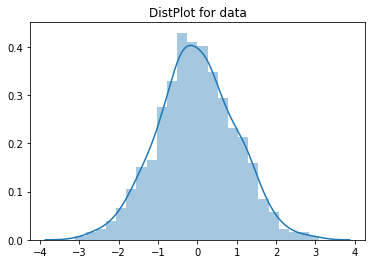

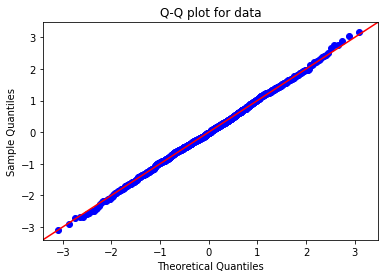

Shapiro-Wilk Test
Accept Ho: Distribution is normal (alpha = 0.05)
P_value:  0.9265132546424866 

D’Agostino’s Test
Accept Ho: Distribution is normal (alpha = 0.05)
P_value:  0.9846850126988143 

Anderson-Darling Test
Statistic: 0.262
15.000: 0.574, Accept Ho: Distribution is normal
10.000: 0.653, Accept Ho: Distribution is normal
5.000: 0.784, Accept Ho: Distribution is normal
2.500: 0.914, Accept Ho: Distribution is normal
1.000: 1.088, Accept Ho: Distribution is normal


In [5]:
normality_test(normal_data)

Data describe 

DescribeResult(nobs=1000, minmax=(0.004514389955981857, 9.99115865395031), mean=5.046354360177358, variance=8.359561525571912, skewness=-0.03273535047944252, kurtosis=-1.1935096352252417) 



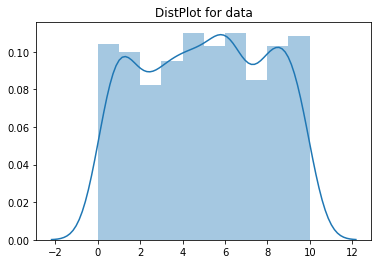

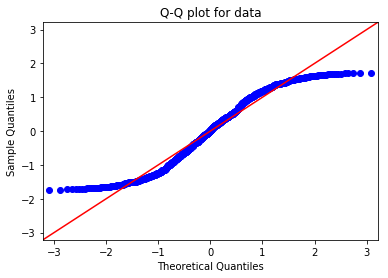

Shapiro-Wilk Test
Reject Ho: Distribution is not normal (alpha = 0.05)
P_value:  2.590157600404441e-17 

D’Agostino’s Test
Reject Ho: Distribution is not normal (alpha = 0.05)
P_value:  2.175179226394302e-152 

Anderson-Darling Test
Statistic: 11.256
15.000: 0.574, Reject Ho: Distribution is not normal (reject H0)
10.000: 0.653, Reject Ho: Distribution is not normal (reject H0)
5.000: 0.784, Reject Ho: Distribution is not normal (reject H0)
2.500: 0.914, Reject Ho: Distribution is not normal (reject H0)
1.000: 1.088, Reject Ho: Distribution is not normal (reject H0)


In [48]:
normality_test(uniform_data)

Data describe 

DescribeResult(nobs=1000, minmax=(-6.162980988589208, 7.109405608746495), mean=-0.007598392902243724, variance=1.5779694747503836, skewness=0.2050480861929623, kurtosis=3.002499461361041) 



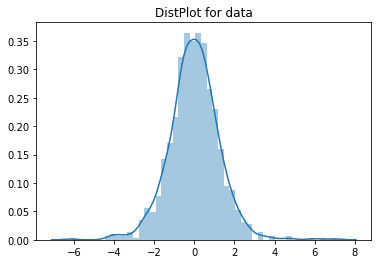

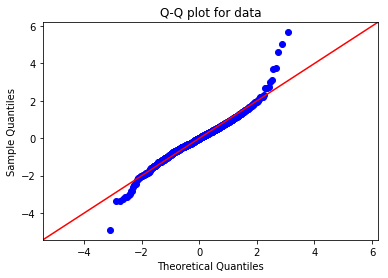

Shapiro-Wilk Test
Reject Ho: Distribution is not normal (alpha = 0.05)
P_value:  4.553513599167558e-13 

D’Agostino’s Test
Reject Ho: Distribution is not normal (alpha = 0.05)
P_value:  1.1416997174913244e-18 

Anderson-Darling Test
Statistic: 3.722
15.000: 0.574, Reject Ho: Distribution is not normal (reject H0)
10.000: 0.653, Reject Ho: Distribution is not normal (reject H0)
5.000: 0.784, Reject Ho: Distribution is not normal (reject H0)
2.500: 0.914, Reject Ho: Distribution is not normal (reject H0)
1.000: 1.088, Reject Ho: Distribution is not normal (reject H0)


In [49]:
df = 6
t_dist_data = np.random.standard_t(df,size = sample_size)
normality_test(t_dist_data)

# HomogenetyTests(equal variances)

In [151]:
def homogeneity_test(data1,data2, alpha=0.05):
    # Bartlett’s test (equal variances)

    print("Homogenity tests","\n")
    print("Data1 describe")
    print(describe(data1),"\n")
    print("Data1 describe")
    print(describe(data2),"\n")
    print('Bartlett’s test')
    stat, p = bartlett(data1, data2)
    if p > alpha:
        print('Accept Ho: All input samples are from populations with equal variances (alpha = {0})'.format(alpha))
    else:
        print('Reject Ho: All input samples are not from populations with equal variances (alpha = {0})'.format(alpha))
    print('\n')

    # Levene test (equal variances)
    print('Levene’s test')
    stat, p = levene(data1, data2)

    if p > alpha:
        print('Accept Ho: All input samples are from populations with equal variances (alpha = 5%)')
    else:
        print('Reject Ho: All input samples are not from populations with equal variances (alpha = 5%)')
    print('\n')
    print('======================================================================')

In [152]:
np.random.seed(45)

data1 = np.random.normal(10,11,size = sample_size)
data2 = np.random.normal(20,20,size = sample_size)
homogeneity_test(data1,data2)

Homogenity tests 

Data1 describe
DescribeResult(nobs=100, minmax=(-18.565664932827154, 34.72898530500063), mean=8.469025071299011, variance=105.92804684388047, skewness=0.03284004386335348, kurtosis=0.08816203438577697) 

Data1 describe
DescribeResult(nobs=100, minmax=(-28.540729591973047, 79.87267951658126), mean=21.508089363600288, variance=405.06711744317147, skewness=0.0018394821021047111, kurtosis=-0.052408309407002474) 

Bartlett’s test
Reject Ho: All input samples are not from populations with equal variances (alpha = 0.05)


Levene’s test
Reject Ho: All input samples are not from populations with equal variances (alpha = 5%)




In [153]:
np.random.seed(45)

data1 = np.random.normal(10,11,size = sample_size)
data2 = np.random.normal(20,11.5,size = sample_size)
homogeneity_test(data1,data2)

Homogenity tests 

Data1 describe
DescribeResult(nobs=100, minmax=(-18.565664932827154, 34.72898530500063), mean=8.469025071299011, variance=105.92804684388047, skewness=0.03284004386335348, kurtosis=0.08816203438577697) 

Data1 describe
DescribeResult(nobs=100, minmax=(-7.910919515384503, 54.42679072203422), mean=20.86715138407017, variance=133.92531570464854, skewness=0.0018394821021039077, kurtosis=-0.05240830940700203) 

Bartlett’s test
Accept Ho: All input samples are from populations with equal variances (alpha = 0.05)


Levene’s test
Accept Ho: All input samples are from populations with equal variances (alpha = 5%)




# Parametric Tests

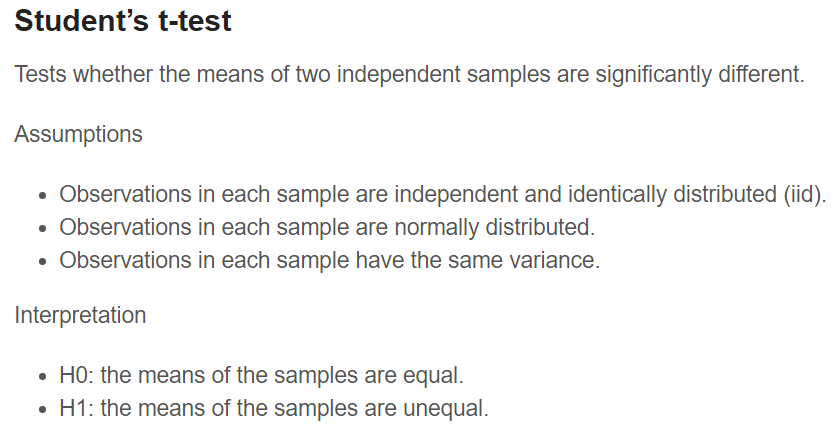

In [154]:
def ind_ttest(data1,data2,alpha=0.05):
    print("Data1 describe")
    print(describe(data1),"\n")
    print("Data1 describe")
    print(describe(data2),"\n")
    
    X = np.concatenate((data1.reshape(-1,1),data2.reshape(-1,1)),axis=1)
    sns.boxplot(data = X)
    plt.show()
    print('Inependent T-test')
    stat, p = ttest_ind(data1, data2)

    if p > alpha:
        print('Accept Ho: Input samples are from populations with equal means (alpha = {0})'.format(alpha))
    else:
        print('Reject Ho: Input samples are not from populations with equal means (alpha = {0})'.format(alpha))
    print('\n')
    print('======================================================================')

Data1 describe
DescribeResult(nobs=100, minmax=(-10.968786302570138, 37.48089573181875), mean=13.60820461027183, variance=87.54384036684334, skewness=0.032840043863353006, kurtosis=0.08816203438577697) 

Data1 describe
DescribeResult(nobs=100, minmax=(-14.270364795986524, 39.93633975829063), mean=10.754044681800144, variance=101.26677936079287, skewness=0.0018394821021047111, kurtosis=-0.052408309407002474) 



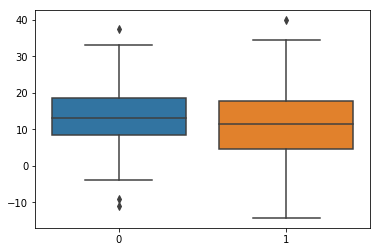

Inependent T-test
Reject Ho: Input samples are not from populations with equal means (alpha = 0.05)




In [176]:
np.random.seed(45)
sample_size = 100
data1 = np.random.normal(15,10,size = sample_size)
data2 = np.random.normal(10,10,size = sample_size)
ind_ttest(data1,data2,alpha = 0.05)

# Paired T-Test(not independent)

In [177]:
def rel_indtest(data1,data2,alpha=0.05):
    print("Data1 describe")
    print(describe(data1),"\n")
    print("Data1 describe")
    print(describe(data2),"\n")
    
    X = np.concatenate((data1.reshape(-1,1),data2.reshape(-1,1)),axis=1)
    sns.boxplot(data = X)
    plt.show()
    print('Inependent T-test')
    stat, p = ttest_rel(data1, data2)

    if p > alpha:
        print('Accept Ho: Input samples are from populations with equal means (alpha = {0})'.format(alpha))
    else:
        print('Reject Ho: Input samples are not from populations with equal means (alpha = {0})'.format(alpha))
    print('\n')
    print('======================================================================')

Data1 describe
DescribeResult(nobs=100, minmax=(37.16220189157398, 64.1749134841609), mean=49.75945081180707, variance=27.012291140052184, skewness=0.300210412229507, kurtosis=0.23111593870673586) 

Data1 describe
DescribeResult(nobs=100, minmax=(38.49232539744953, 62.14330875219242), mean=50.86572351853323, variance=22.506300769770252, skewness=-0.07712355308232847, kurtosis=-0.08267077894235797) 



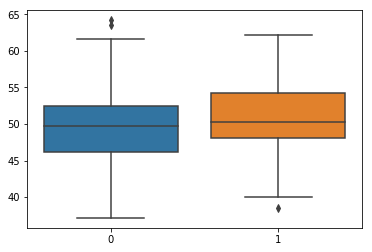

Inependent T-test
Accept Ho: Input samples are from populations with equal means (alpha = 0.05)




In [181]:
data1 = 5 * np.random.randn(100) + 50
data2 = 5 * np.random.randn(100) + 51
rel_indtest(data1,data2)

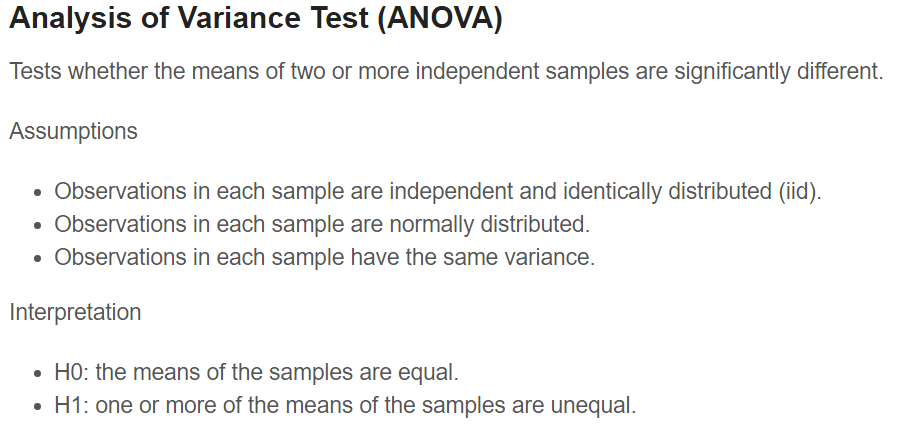

In [158]:
def anova_test(data1,data2,data3,alpha=0.05):

    # anova test (equal means)
    print("Data1 describe")
    print(describe(data1),"\n")
    print("Data1 describe")
    print(describe(data2),"\n")
    
    X = np.concatenate((data1.reshape(-1,1),data2.reshape(-1,1),data3.reshape(-1,1)),axis=1)
    sns.boxplot(data = X)
    plt.show()
    
    print("\n")

    print('ANOVA test')
    stat, p = f_oneway(data1, data2, data3)

    if p > alpha:
        print('Accept Ho: Input samples are from populations with equal means (alpha = {0})'.format(alpha))
    else:
        print('Reject Ho: Input samples are not from populations with equal means (alpha = {0})'.format(alpha))
    print('\n')
    print('======================================================================')

Data1 describe
DescribeResult(nobs=100, minmax=(-10.968786302570138, 37.48089573181875), mean=13.60820461027183, variance=87.54384036684334, skewness=0.032840043863353006, kurtosis=0.08816203438577697) 

Data1 describe
DescribeResult(nobs=100, minmax=(-9.270364795986524, 44.93633975829063), mean=15.754044681800146, variance=101.26677936079287, skewness=0.0018394821021044416, kurtosis=-0.052408309407002474) 



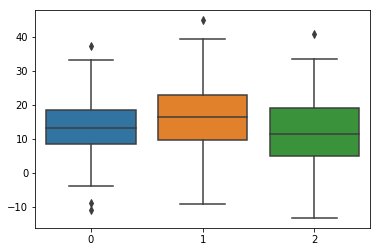



ANOVA test
Reject Ho: Input samples are not from populations with equal means (alpha = 0.05)




In [182]:
np.random.seed(45)
sample_size = 100
data1 = np.random.normal(15,10,size = sample_size)
data2 = np.random.normal(15,10,size = sample_size)
data3 = np.random.normal(10,10,size = sample_size)
anova_test(data1,data2,data3)

# Non-parametric tests

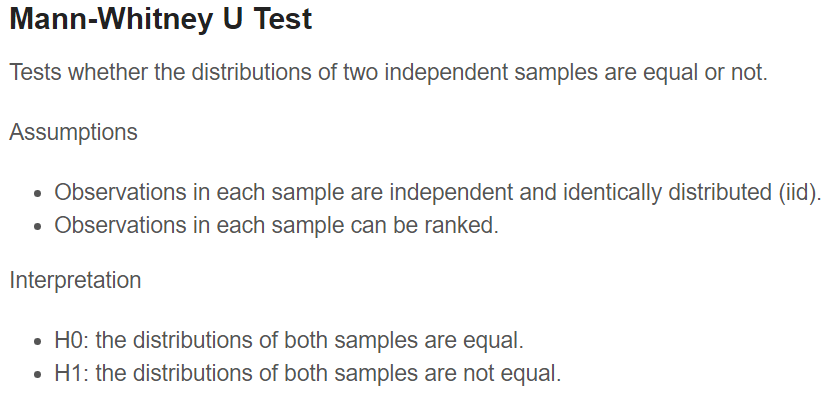

In [183]:
def mann_whitney(data1,data2,alpha=0.05):
    # MannWhitney test for two independent samples (equal means)

    print("Data1 describe")
    print(describe(data1),"\n")
    print("Data1 describe")
    print(describe(data2),"\n")
    sns.distplot(data1).set_title("data1")
    plt.show()
    sns.distplot(data2).set_title("data2")
    plt.show()
    
    print('Mann-Whitney test')
    stat, p = mannwhitneyu(data1, data2)

    if p > alpha:
        print('Accept Ho:  The distributions of both samples are equal. (alpha = {0})'.format(alpha))
    else:
        print('Reject Ho:  the distributions of both samples are not equal. (alpha = {0})'.format(alpha))
    print('\n')

Data1 describe
DescribeResult(nobs=100, minmax=(37.49232539744953, 61.14330875219242), mean=50.133948622046645, variance=22.098562308150452, skewness=-0.23648174512570766, kurtosis=0.2118630731096771) 

Data1 describe
DescribeResult(nobs=100, minmax=(39.50145779152124, 64.0138240865612), mean=50.05070116726197, variance=22.380850686088266, skewness=0.16525071656557272, kurtosis=0.3522178279833277) 



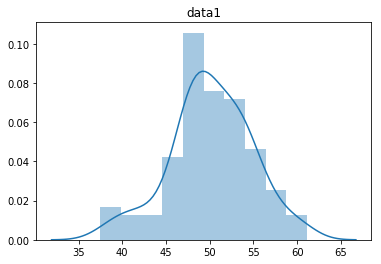

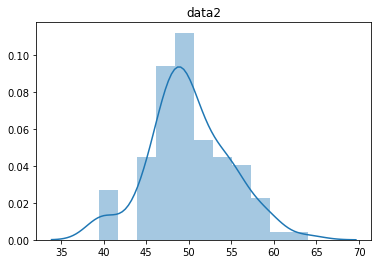

Mann-Whitney test
Accept Ho:  The distributions of both samples are equal. (alpha = 0.05)




In [189]:
data1 = 5 * np.random.randn(100) + 50
data2 = 5 * np.random.randn(100) + 50
mann_whitney(data1,data2)

Data1 describe
DescribeResult(nobs=100, minmax=(39.645455455836824, 62.18751136514337), mean=50.64433410421031, variance=27.459090435720647, skewness=-0.0459492789636805, kurtosis=-0.4867189991701637) 

Data1 describe
DescribeResult(nobs=100, minmax=(37.443554393098324, 62.17390539769283), mean=50.8755866258759, variance=29.38815517867729, skewness=-0.01763106700941225, kurtosis=-0.5843185032129536) 



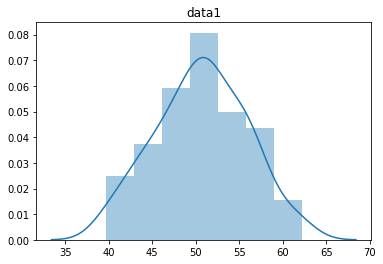

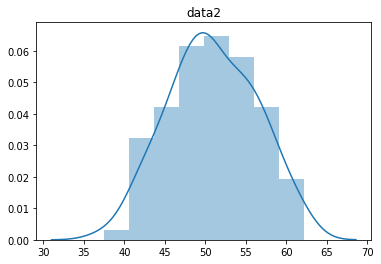

Mann-Whitney test
Accept Ho:  The distributions of both samples are equal. (alpha = 0.05)




In [190]:
data1 = 5 * np.random.randn(100) + 50
data2 = 5 * np.random.randn(100) + 51
mann_whitney(data1,data2)

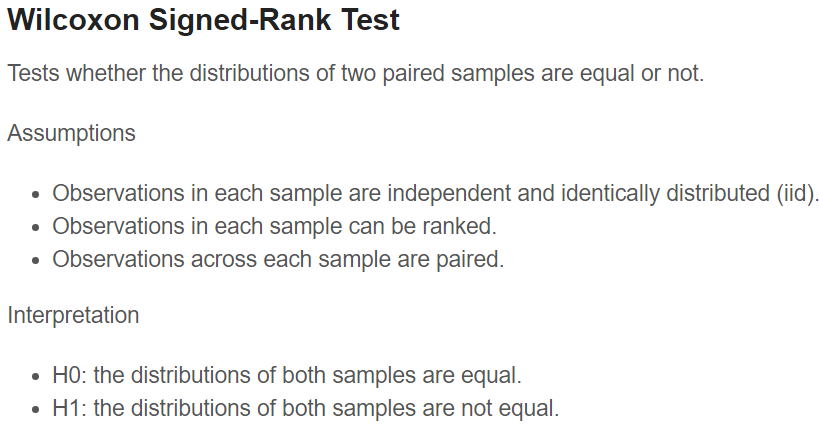

In [194]:
def WilcoxonRankSum(data1,data2, alpha=0.05):
    # Wilcoxon Rank-Sum test for two independent samples (equal means)
    print("Data1 describe")
    print(describe(data1),"\n")
    print("Data1 describe")
    print(describe(data2),"\n")
    sns.distplot(data1).set_title("data1")
    plt.show()
    sns.distplot(data2).set_title("data2")
    plt.show()
    
    print('WilcoxonRankSum')
    stat, p = ranksums(data1, data2)
    if p > alpha:
        print('Accept Ho:  The distributions of both samples are equal. (alpha = {0})'.format(alpha))
    else:
        print('Reject Ho:  the distributions of both samples are not equal. (alpha = {0})'.format(alpha))
    print('\n')

Data1 describe
DescribeResult(nobs=100, minmax=(36.390633796662804, 63.28377048749512), mean=49.848989932220384, variance=26.903584849605114, skewness=-0.0689880211464725, kurtosis=-0.25754675568403895) 

Data1 describe
DescribeResult(nobs=100, minmax=(38.27764533637924, 63.60407907513306), mean=50.38286392531234, variance=26.245679527718412, skewness=0.07177332341284183, kurtosis=0.1630727017092708) 



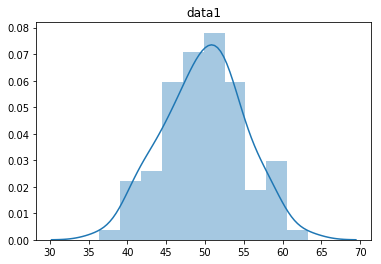

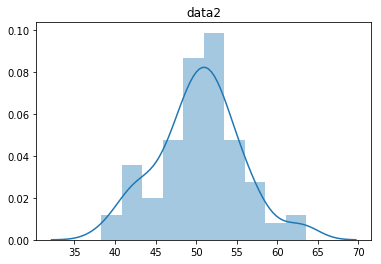

WilcoxonRankSum
Accept Ho:  The distributions of both samples are equal. (alpha = 0.05)




In [195]:
data1 = 5 * np.random.randn(100) + 50
data2 = 5 * np.random.randn(100) + 50
WilcoxonRankSum(data1,data2)

Data1 describe
DescribeResult(nobs=100, minmax=(38.540153137559415, 63.20732580055368), mean=50.00129593069848, variance=26.4779194666109, skewness=-0.07038253739283981, kurtosis=-0.4574476377765371) 

Data1 describe
DescribeResult(nobs=100, minmax=(39.929200854614635, 67.5119209318632), mean=54.536680046035556, variance=33.244004436805916, skewness=-0.12761578029513368, kurtosis=-0.3019832271670224) 



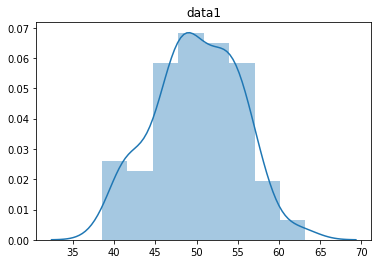

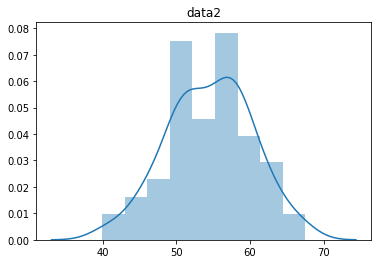

WilcoxonRankSum
Reject Ho:  the distributions of both samples are not equal. (alpha = 0.05)




In [197]:
data1 = 5 * np.random.randn(100) + 50
data2 = 5 * np.random.randn(100) + 55
WilcoxonRankSum(data1,data2)

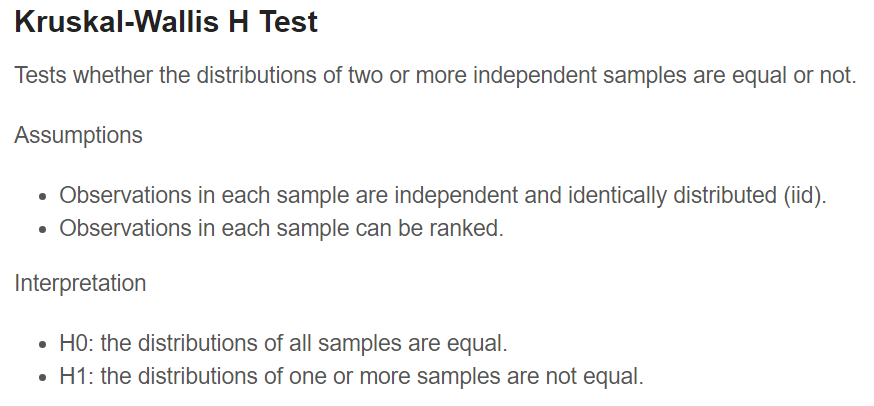

In [198]:
def kruskal_wallis_h_test(data1,data2,data3, alpha=0.05):
    # Kruskal-Wallis H-test for independent samples (non-parametric version of ANOVA)
    print("Data1 describe")
    print(describe(data1),"\n")
    print("Data2 describe")
    print(describe(data2),"\n")
    print("Data3 describe")
    print(describe(data3),"\n")
    
    sns.distplot(data1).set_title("data1")
    plt.show()
    sns.distplot(data2).set_title("data2")
    plt.show()
    sns.distplot(data3).set_title("data2")
    plt.show()

    print('Kruskal-Wallis H-test')
    stat, p = kruskal(data1, data2, data3)

    if p > alpha:
        print('Accept Ho:  The distributions of both samples are equal. (alpha = {0})'.format(alpha))
    else:
        print('Reject Ho:  the distributions of both samples are not equal. (alpha = {0})'.format(alpha))
    print('\n')

Data1 describe
DescribeResult(nobs=100, minmax=(39.91477383546678, 60.72671562606245), mean=50.18813175407084, variance=22.13222056588731, skewness=0.05951703154547895, kurtosis=-0.5778087048253244) 

Data2 describe
DescribeResult(nobs=100, minmax=(38.46918063108265, 67.03986922834439), mean=53.25739559605345, variance=28.723532867746908, skewness=-0.27865338893911323, kurtosis=0.013760780525783112) 

Data3 describe
DescribeResult(nobs=100, minmax=(38.04188066940701, 61.14505024989093), mean=49.58263260603517, variance=24.313863509512373, skewness=-0.048736919932616495, kurtosis=-0.5455880245943661) 



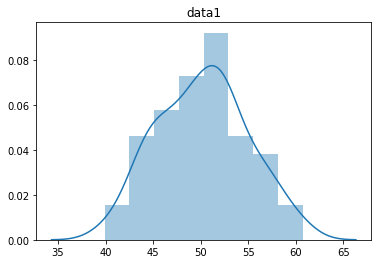

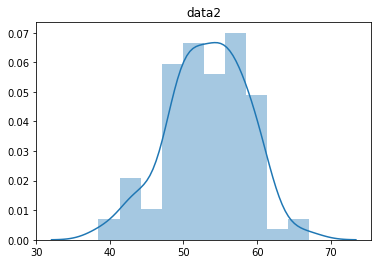

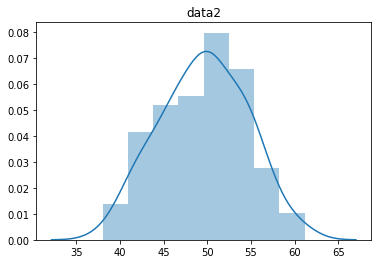

Kruskal-Wallis H-test
Reject Ho:  the distributions of both samples are not equal. (alpha = 0.05)




In [203]:
data1 = 5 * np.random.randn(100) + 50
data2 = 5 * np.random.randn(100) + 53
data3 = 5 * np.random.randn(100) + 50

kruskal_wallis_h_test(data1,data2,data3)